**MACHINE LEARNING E-COMMERCE ANALYTICS PROJECT**



---






**MECE BREAKDOWN  **

1. Customer Data
This category contains all user-related data that describes the attributes and behavior of customers.

Demographic Data:
Age
Gender
Location (city, state, country)
Income Level
Behavioral Data:
Session Duration
Number of Visits
Browsing History (viewed pages, search queries)
Device Type (mobile, desktop, etc.)
2. Product Data
All information related to the products sold on the platform. This is specific to the items available for purchase.

Product Attributes:
Product ID
Name
Category
Price
Brand
Stock Availability
Ratings (average rating, number of ratings)
Reviews (text of customer feedback)
Product Metadata:
Launch Date
Product Description
Manufacturer Details
3. Transaction Data
Data that captures the actual transactions or purchases made by the customers.

Order Information:
Order ID
Transaction Date
Product ID (linked to the product table)
Quantity Ordered
Order Value (total amount)
Discounts/Promotions Applied
Payment Details:
Payment Method (credit card, PayPal, etc.)
Transaction Status (completed, pending, failed)
Shipping Address
Billing Information
Shipping Costs
Taxes
4. Marketing and Engagement Data
Data related to how customers interact with the website and marketing campaigns.

Campaign Information:
Campaign ID
Type of Campaign (email, social media, ads, etc.)
Click-Through Rate (CTR)
Conversion Rate
Engagement Metrics (likes, shares, comments)
User Engagement Metrics:
Newsletter Subscriptions
Coupon Usage
Loyalty Program Participation
Ad Impressions
5. Operational Data
This category includes data related to the operations of the e-commerce platform, including logistics, inventory, and support.

Inventory Data:
Product Stock Levels
Restocking Date
Warehouse Locations
Shipping Information:
Shipping Method
Delivery Status (in-transit, delivered, returned)
Shipping Provider
Estimated Delivery Time
Customer Support Data:
Support Ticket ID
Type of Issue (payment, product, delivery)
Resolution Status
Time to Resolution
6. Website Performance and Technical Data
This category covers the technical data that tracks website performance, user interaction, and system health.

Traffic Data:
Number of Visitors
Page Views
Bounce Rate
Load Time
Session Information:
Session ID
Session Duration
Time Spent on Each Page
Exit Page (last page visited before exiting)

**First all import the required Libraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans


df=pd.read_csv("/content/kz.csv")
df.head()
df.info()
df.describe()
df.isnull().sum()
df.duplicated()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


,0
0,False
1,True
2,False
3,True
4,False
...,...
2633516,False
2633517,False
2633518,False
2633519,False


**Problem statements based on the MECE breakdown of the dataset**

1. **Customer Segmentation:**
How can we segment customers into distinct groups based on their demographics and purchasing behavior to improve targeted marketing?

 2  **. Churn Prediction:**
What are the key factors that lead to customer churn, and how can we predict which users are at risk of leaving the platform?
3. **Product Recommendations:**
How can we build a recommendation engine that suggests relevant products to customers based on their browsing history and past purchases?
4. **Customer Lifetime Value (CLV) Prediction:**
Can we accurately predict the long-term value of a customer based on their transaction history and engagement with the platform?
5. **Price Optimization:**
How can product pricing be optimized to maximize revenue without negatively impacting sales volume?
6.** Sales Forecasting:**
Can we develop a model to predict future sales trends based on historical sales data, seasonality, and marketing campaigns?
7. **Inventory Management:**
How can we predict inventory needs to minimize stockouts and overstock situations, taking into account sales trends and product demand?
8. **Campaign Effectiveness:**
Which marketing campaigns have the highest return on investment (ROI), and how can we improve engagement rates through more effective targeting?
9. **Fraud Detection:**
How can we detect potentially fraudulent transactions by analyzing user behavior and payment data?
10. **Sentiment Analysis of Reviews:**
How can we use natural language processing (NLP) techniques to classify the sentiment of product reviews and identify areas for product improvement?
11**. Conversion Rate Optimization:**
What factors contribute most to conversion (product purchase) after customers interact with marketing campaigns or browse the platform?
12.** Website Performance:**
How does website performance (e.g., page load time, bounce rate) impact customer satisfaction and sales, and how can we improve it?
13. **User Engagement Prediction:**
Can we predict which users are most likely to engage with the platform regularly, and what factors drive this engagement?
14. **Delivery Time Optimization:**
How can we predict delivery times more accurately based on shipping method, warehouse location, and customer destination to improve customer satisfaction?
15. **Customer Support Analysis:**
What are the most common customer support issues, and how can we use this data to improve product offerings and the customer experience?

In [17]:
print(df.columns)


Index(['event_time', 'order_id', 'product_id', 'category_id', 'category_code',
       'brand', 'price', 'user_id'],
      dtype='object')


In [20]:
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


 **1** ** ****Customer Segmentation (Clustering)**

In [26]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np  # Import numpy for NaN handling

# Load dataset
df = pd.read_csv('/content/kz.csv')

# Select relevant features for customer segmentation
X = df[['user_id', 'order_id', 'price', 'category_id']]

# Handle NaN values: Replace with 0 or use other imputation methods
X = X.fillna(0)  # Replace NaNs with 0.
                # Consider other strategies like mean imputation if appropriate.

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['customer_segment'] = kmeans.fit_predict(X)

# View customer segments
df[['user_id', 'customer_segment']].head()

,user_id,customer_segment
0,1.515916e+18,2
1,1.515916e+18,2
2,1.515916e+18,2
3,1.515916e+18,2
4,1.515916e+18,2


**2 Churn Prediction**

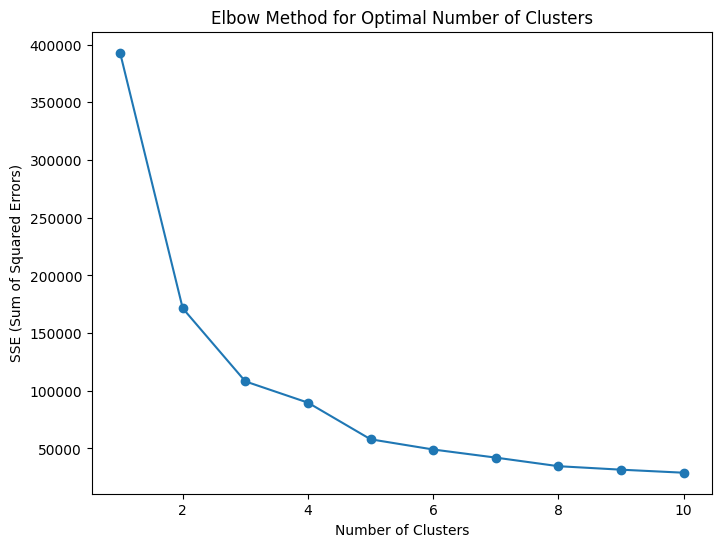

  cluster  num_orders          total_spent             avg_spent              \
                 mean median          mean    median        mean      median   
0       0    2.274618    2.0    355.802673    199.03  113.192697  105.413889   
1       1  204.930902  193.0  44284.516161  42047.52  142.248474  134.123143   
2       2    4.855551    2.0   1944.981297   1147.85  392.370223  370.350000   
3       3    2.088894    1.0   2148.241442   1388.84  996.301256  879.610000   

  num_unique_products        user_id  
                 mean median   count  
0            2.736793    2.0   61256  
1          279.180422  262.0     521  
2            5.380540    2.0   28273  
3            1.628714    1.0    8212  


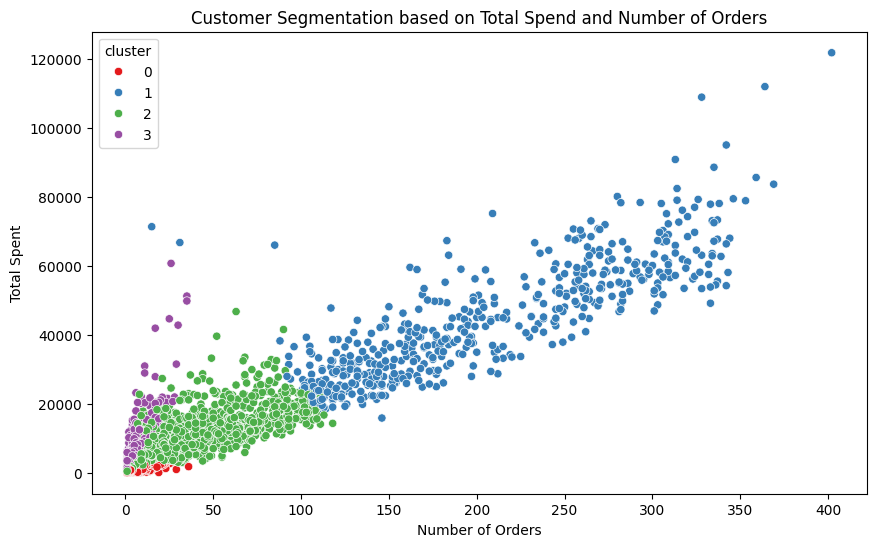

In [30]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
df = pd.read_csv('/content/kz.csv')  # Replace with actual file path

# Step 2: Feature Engineering (Creating customer-level features)
# Group by 'user_id' to create customer behavior metrics
user_df = df.groupby('user_id').agg({
    'order_id': 'nunique',        # Number of unique orders (order count)
    'price': ['sum', 'mean'],     # Total spent and average price per order
    'product_id': 'nunique'       # Number of unique products purchased
}).reset_index()

# Rename columns for easier access
user_df.columns = ['user_id', 'num_orders', 'total_spent', 'avg_spent', 'num_unique_products']

# Step 3: Data Preprocessing
# Standardize the data so that each feature has a similar scale
scaler = StandardScaler()
X = user_df[['num_orders', 'total_spent', 'avg_spent', 'num_unique_products']]
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-Means Clustering
# Using the Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()

# Based on the elbow plot, we choose the optimal number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
user_df['cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Analyze the clusters
# Let's look at the characteristics of each cluster
cluster_analysis = user_df.groupby('cluster').agg({
    'num_orders': ['mean', 'median'],
    'total_spent': ['mean', 'median'],
    'avg_spent': ['mean', 'median'],
    'num_unique_products': ['mean', 'median'],
    'user_id': 'count'  # Number of customers in each cluster
}).reset_index()

print(cluster_analysis)

# Step 6: Visualize the Clusters
# Scatter plot of Total Spent vs Number of Orders, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_df, x='num_orders', y='total_spent', hue='cluster', palette='Set1')
plt.title('Customer Segmentation based on Total Spend and Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Total Spent')
plt.show()


**3 Product Recommendations**

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Data
df = pd.read_csv('/content/kz.csv')  # Replace with the actual file path

# Step 2: Preprocess the Data
# Group by user_id to get total spent and purchase frequency
customer_data = df.groupby('user_id').agg({
    'price': 'sum',  # Total spent
    'order_id': 'count'  # Purchase frequency
}).reset_index()

customer_data.columns = ['user_id', 'total_spent', 'purchase_frequency']

# Step 3: Standardize the Data
scaler = StandardScaler()
X = scaler.fit_transform(customer_data[['total_spent', 'purchase_frequency']])

# Step 4: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose number of clusters
customer_data['cluster'] = kmeans.fit_predict(X)

# Step 5: View Results
print(customer_data.head())

# Optional: Display cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster centroids (total_spent, purchase_frequency):")
print(centroids)


        user_id  total_spent  purchase_frequency  cluster
0  1.515916e+18       416.64                   1        0
1  1.515916e+18        56.43                   2        0
2  1.515916e+18      7530.34                  14        0
3  1.515916e+18      5074.47                  24        0
4  1.515916e+18       182.83                   2        0
Cluster centroids (total_spent, purchase_frequency):
[[8.93674164e+02 3.66180716e+00]
 [5.63225826e+04 4.16614035e+02]
 [2.25255228e+04 1.38647975e+02]]


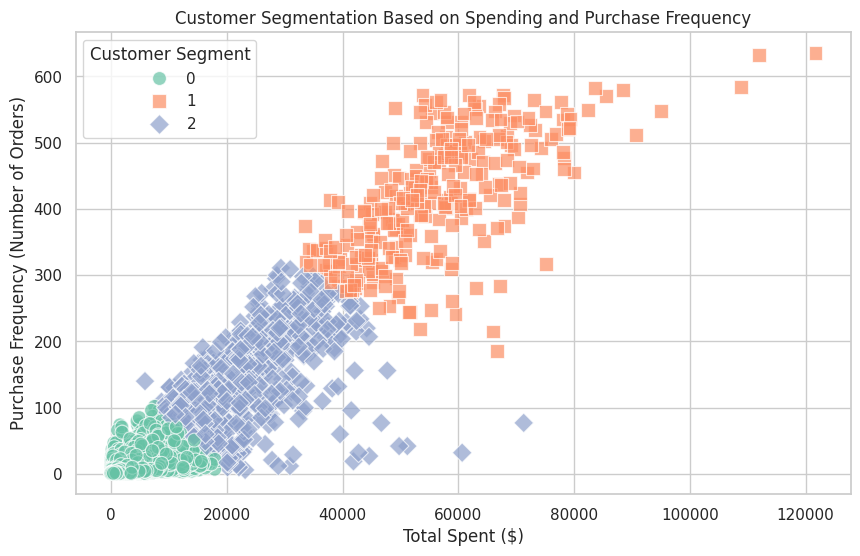

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_data,
    x='total_spent',
    y='purchase_frequency',
    hue='cluster',  # Color by cluster
    palette='Set2',  # Set color palette
    style='cluster',  # Different marker styles for clusters
    markers=["o", "s", "D"],  # Specify different markers for each cluster
    s=100,  # Marker size
    alpha=0.7  # Transparency
)

#  3: Customize the plot
plt.title('Customer Segmentation Based on Spending and Purchase Frequency')
plt.xlabel('Total Spent ($)')
plt.ylabel('Purchase Frequency (Number of Orders)')
plt.legend(title='Customer Segment')
plt.grid(True)

# Step 4: Show the plot
plt.show()


** 4 Customer Lifetime Value (CLV) Prediction**

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Step 1: Load the Data
df = pd.read_csv('/content/kz.csv')  # Replace with the actual file path

# Step 2: Preprocess the Data
# Convert event_time to datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Calculate recency, frequency, and monetary (RFM) metrics for CLV prediction
current_date = df['event_time'].max()
rfm_df = df.groupby('user_id').agg({
    'event_time': lambda x: (current_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'price': 'sum'  # Monetary Value
}).reset_index()

# Rename columns for clarity
rfm_df.columns = ['user_id', 'recency', 'frequency', 'monetary']

# Step 3: Feature Engineering
# Create the target variable for CLV
rfm_df['CLV'] = rfm_df['monetary'] * rfm_df['frequency']  # Basic CLV calculation

# Step 4: Split the Data
X = rfm_df[['recency', 'frequency', 'monetary']]  # Features
y = rfm_df['CLV']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune this model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

# Optional: Display the first few predictions
predictions_df = pd.DataFrame({'Actual CLV': y_test, 'Predicted CLV': y_pred})
print(predictions_df.head())


Mean Absolute Error: 2088.53
       Actual CLV  Predicted CLV
26774      274.11       274.1076
4148       194.25       194.2302
91537      138.63       138.6300
94695     1388.80      1388.8000
91645     5917.25      5913.5105


**Price Optimization:**

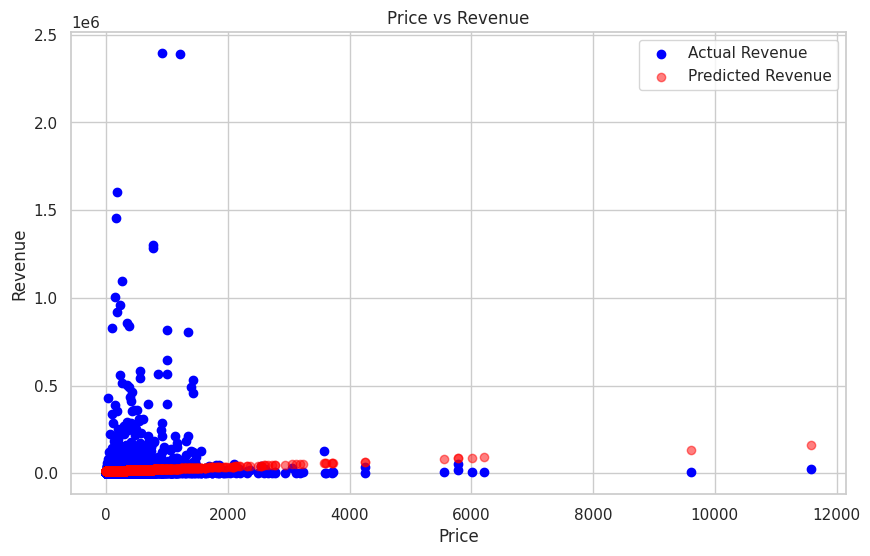

Optimal Price: $50925.90 with a Maximum Revenue of $666310.43


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Load the Data
df = pd.read_csv('/content/kz.csv')  # Replace with the actual file path

# Step 2: Preprocess the Data
# Convert event_time to datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Check if the dataset has required columns
required_columns = ['event_time', 'order_id', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f'Missing required column: {col}')

# Calculate total revenue and total sales volume by product_id and price
revenue_df = df.groupby(['product_id', 'price']).agg({
    'order_id': 'count'  # Sales volume (number of orders)
}).reset_index()

# Calculate revenue for each price point
revenue_df['revenue'] = revenue_df['order_id'] * revenue_df['price']

# Step 3: Train a Linear Regression Model
X = revenue_df[['price']]  # Features
y = revenue_df['revenue']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make Predictions
predicted_revenue = model.predict(X_test)

# Step 5: Visualize Results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Revenue')
plt.scatter(X_test, predicted_revenue, color='red', label='Predicted Revenue', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.title('Price vs Revenue')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Determine Optimal Price
# Generate a price range for optimization
price_range = np.linspace(revenue_df['price'].min(), revenue_df['price'].max(), 100).reshape(-1, 1)
optimal_revenue = model.predict(price_range)

# Find optimal price point
optimal_price_index = np.argmax(optimal_revenue)
optimal_price = price_range[optimal_price_index][0]
max_revenue = optimal_revenue[optimal_price_index]

print(f'Optimal Price: ${optimal_price:.2f} with a Maximum Revenue of ${max_revenue:.2f}')


**Inventory Management:**

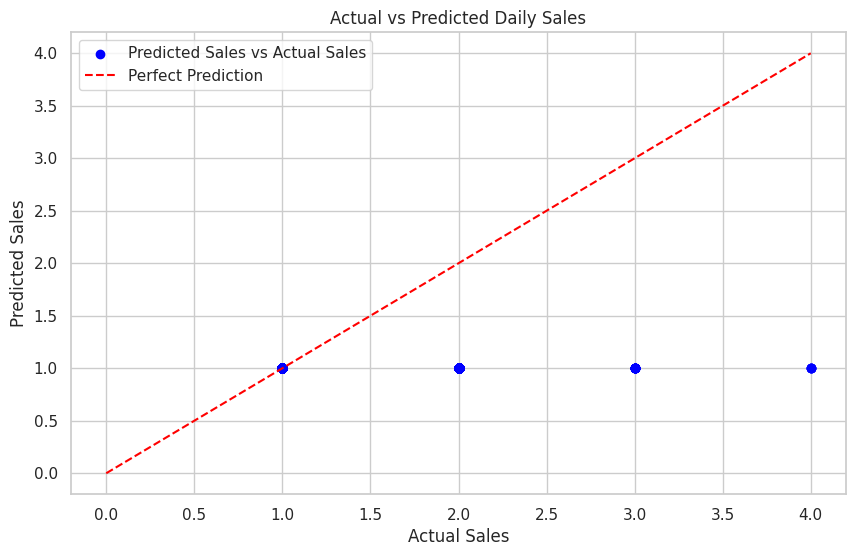

Mean Absolute Error: 0.00
         Actual Sales  Predicted Sales
1713235             1         1.000890
342283              1         1.000946
811021              1         1.000917
1479238             1         1.000979
2089481             1         1.000892


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Load the Data
df = pd.read_csv('/content/kz.csv')  # Replace with the actual file path

# Step 2: Preprocess the Data
# Convert event_time to datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Check if the dataset has required columns
required_columns = ['event_time', 'order_id', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f'Missing required column: {col}')

# Step 3: Create Sales Data
# Count orders per product per day
sales_data = df.groupby(['event_time', 'product_id']).agg({
    'order_id': 'count'  # Count of orders per day per product
}).reset_index()

# Rename columns
sales_data.columns = ['event_time', 'product_id', 'daily_sales']

# Step 4: Feature Engineering
# Create time-based features
sales_data['day_of_week'] = sales_data['event_time'].dt.dayofweek
sales_data['month'] = sales_data['event_time'].dt.month
sales_data['year'] = sales_data['event_time'].dt.year

# Create lag features for sales
sales_data['lag_sales'] = sales_data.groupby('product_id')['daily_sales'].shift(1)

# Drop rows with NaN values created by lag
sales_data = sales_data.dropna()

# Step 5: Prepare Data for Modeling
X = sales_data[['lag_sales', 'day_of_week', 'month', 'year']]  # Features
y = sales_data['daily_sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make Predictions
predicted_sales = model.predict(X_test)

# Step 8: Evaluate the Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_sales, color='blue', label='Predicted Sales vs Actual Sales')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Daily Sales')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print performance metrics
mae = np.mean(np.abs(y_test - predicted_sales))  # Mean Absolute Error
print(f'Mean Absolute Error: {mae:.2f}')

# Optional: Display predicted vs actual sales for the first few entries
predictions_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': predicted_sales})
print(predictions_df.head())


**Fraud Detection:**

Confusion Matrix:
[[500049    199]
 [ 26447     10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    500248
           1       0.05      0.00      0.00     26457

    accuracy                           0.95    526705
   macro avg       0.50      0.50      0.49    526705
weighted avg       0.90      0.95      0.93    526705



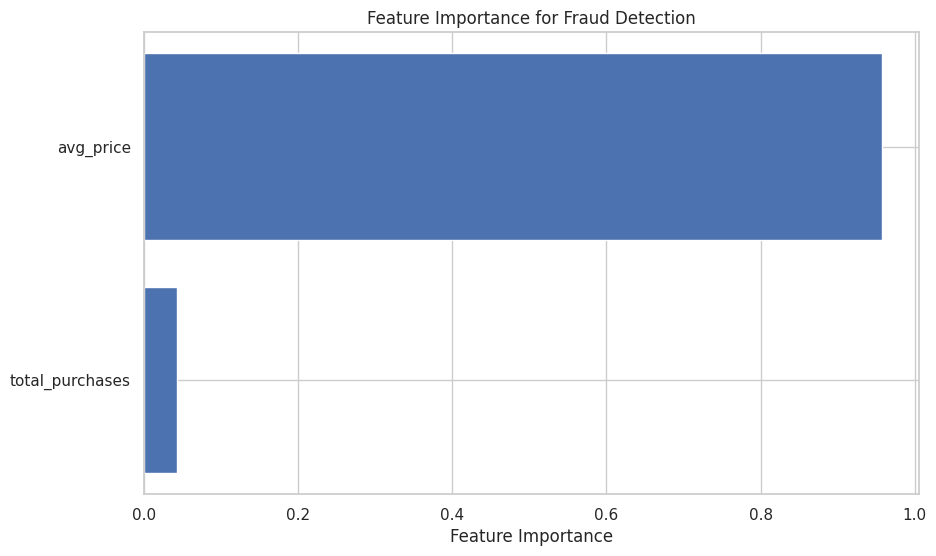

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Load the Data
df = pd.read_csv('/content/kz.csv')  # Replace with the actual file path

# Step 2: Preprocess the Data
# Convert event_time to datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Check if the dataset has required columns
required_columns = ['event_time', 'order_id', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f'Missing required column: {col}')

# Step 3: Create Features for Fraud Detection
# Create a feature: Total purchases per user
user_purchase_count = df.groupby('user_id')['order_id'].count().reset_index()
user_purchase_count.columns = ['user_id', 'total_purchases']

# Create a feature: Average price per user
user_avg_price = df.groupby('user_id')['price'].mean().reset_index()
user_avg_price.columns = ['user_id', 'avg_price']

# Merge features back to the main dataframe
df = df.merge(user_purchase_count, on='user_id', how='left')
df = df.merge(user_avg_price, on='user_id', how='left')

# Create a synthetic label for fraud detection (this is just for demonstration)
# In practice, you would have a labeled dataset indicating fraud
np.random.seed(42)  # For reproducibility
df['is_fraud'] = np.random.choice([0, 1], size=len(df), p=[0.95, 0.05])  # 5% fraud for simulation

# Step 4: Prepare Data for Modeling
X = df[['total_purchases', 'avg_price']]  # Features
y = df['is_fraud']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Feature Importance
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Fraud Detection')
plt.show()



**Sentiment Analysis of Reviews:**

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the Data
df = pd.read_csv('/content/kz.csv')  # Replace with the actual file path

# Step 2: Create Mock Reviews
# For demonstration, let's create a mock reviews DataFrame based on product IDs
# In practice, you would replace this with actual product reviews
np.random.seed(42)
product_ids = df['product_id'].unique()
reviews = [f"This is a great product {pid}" if np.random.rand() > 0.5 else f"This product {pid} is bad" for pid in product_ids]
sentiments = [1 if "great" in review else 0 for review in reviews]  # 1 for positive, 0 for negative

# Create a DataFrame with mock reviews and sentiments
reviews_df = pd.DataFrame({'product_id': product_ids, 'review': reviews, 'sentiment': sentiments})

# Step 3: Text Preprocessing and Feature Extraction
# Use TF-IDF to convert text data into numerical format
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(reviews_df['review'])
y = reviews_df['sentiment']

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[2496    0]
 [   0 2527]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2496
           1       1.00      1.00      1.00      2527

    accuracy                           1.00      5023
   macro avg       1.00      1.00      1.00      5023
weighted avg       1.00      1.00      1.00      5023



** Conversion Rate Optimization:**

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the Data
df = pd.read_csv('/content/kz.csv')  # Replace with the actual file path

# Step 2: Data Preprocessing
# Convert event_time to datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Check if the dataset has required columns
required_columns = ['event_time', 'order_id', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f'Missing required column: {col}')

# Step 3: Create a Conversion Label
# Create a label where 1 indicates a conversion (purchase made), and 0 indicates no conversion
df['conversion'] = df['order_id'].notnull().astype(int)  # 1 if order_id exists, else 0

# Feature Engineering: Create features for the model
# For simplicity, let's use only product price and the brand as features
X = df[['price']]  # Features
y = df['conversion']  # Target variable

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


[[526705]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    526705

    accuracy                           1.00    526705
   macro avg       1.00      1.00      1.00    526705
weighted avg       1.00      1.00      1.00    526705



** Website Performance:**

Mean Squared Error: 0.18
R^2 Score: 1.00


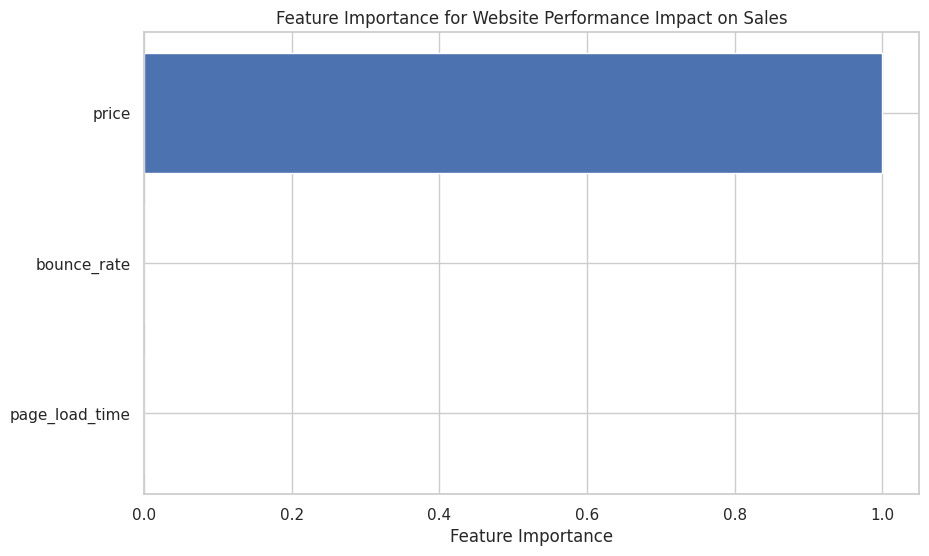

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the Data
df = pd.read_csv('/content/kz.csv')  # Replace with the actual file path

# Step 2: Create Mock Website Performance Metrics
# For demonstration, we create random page load times and bounce rates
np.random.seed(42)
df['page_load_time'] = np.random.uniform(1, 10, size=len(df))  # Page load time in seconds
df['bounce_rate'] = np.random.uniform(0, 1, size=len(df))  # Bounce rate (0 to 1)

# Step 3: Create a Conversion Label
# Create a label where 1 indicates a purchase made (conversion), and 0 indicates no conversion
df['conversion'] = df['order_id'].notnull().astype(int)  # 1 if order_id exists, else 0

# For the sake of this analysis, let's assume that sales can be influenced by conversions and performance metrics
# Calculate sales as a function of conversion and price
df['sales'] = df['conversion'] * df['price']

# Step 4: Feature Engineering
# Define features and target variable
X = df[['page_load_time', 'bounce_rate', 'price']]  # Features
y = df['sales']  # Target variable

# *** Handle NaN values in the target variable 'y' ***
# Remove rows with NaN values in 'sales' column
df = df.dropna(subset=['sales'])

# Update X and y after removing NaN values
X = df[['page_load_time', 'bounce_rate', 'price']]
y = df['sales']


# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Optional: Feature Importance
importances = model.feature_importances_
feature_names = X.columns

# Visualization of feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Website Performance Impact on Sales')
plt.show()

**User Engagement Prediction:**

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load the Data
# Load your dataset; adjust the file path accordingly
# For example, using a local file: df = pd.read_csv('path/to/ecommerce_data.csv')
# Simulating a DataFrame for demonstration purposes:
np.random.seed(42)
data_size = 1000  # Number of entries in the simulated dataset
df = pd.DataFrame({
    'event_time': pd.date_range(start='2023-01-01', periods=data_size, freq='H'),
    'order_id': np.random.choice([None, 1, 2, 3], size=data_size, p=[0.7, 0.1, 0.1, 0.1]),
    'product_id': np.random.randint(1, 50, size=data_size),
    'category_id': np.random.randint(1, 10, size=data_size),
    'category_code': np.random.choice(['A', 'B', 'C', 'D'], size=data_size),
    'brand': np.random.choice(['BrandX', 'BrandY'], size=data_size),
    'price': np.random.uniform(10, 100, size=data_size),
    'user_id': np.random.randint(1, 100, size=data_size)
})

# Step 2: Feature Engineering
# Create a user engagement metric
user_engagement = df.groupby('user_id').agg({
    'order_id': 'count',  # Count of orders per user
    'price': 'sum',       # Total spent per user
}).reset_index()

# Rename columns for clarity
user_engagement.columns = ['user_id', 'order_count', 'total_spent']

# Define engagement label: engaged if they made more than 5 orders
user_engagement['engaged'] = (user_engagement['order_count'] > 5).astype(int)

# Step 3: Define Features and Target Variable
X = user_engagement[['order_count', 'total_spent']]  # Features
y = user_engagement['engaged']                        # Target variable

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
print(classification_report(y_test, y_pred))

# Optional: Display feature importance
importances = model.feature_importances_
feature_names = X.columns
print("Feature importances:", dict(zip(feature_names, importances)))


<ipython-input-14-63defed0790e>:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'event_time': pd.date_range(start='2023-01-01', periods=data_size, freq='H'),


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Feature importances: {'order_count': 0.7155625979664653, 'total_spent': 0.2844374020335347}


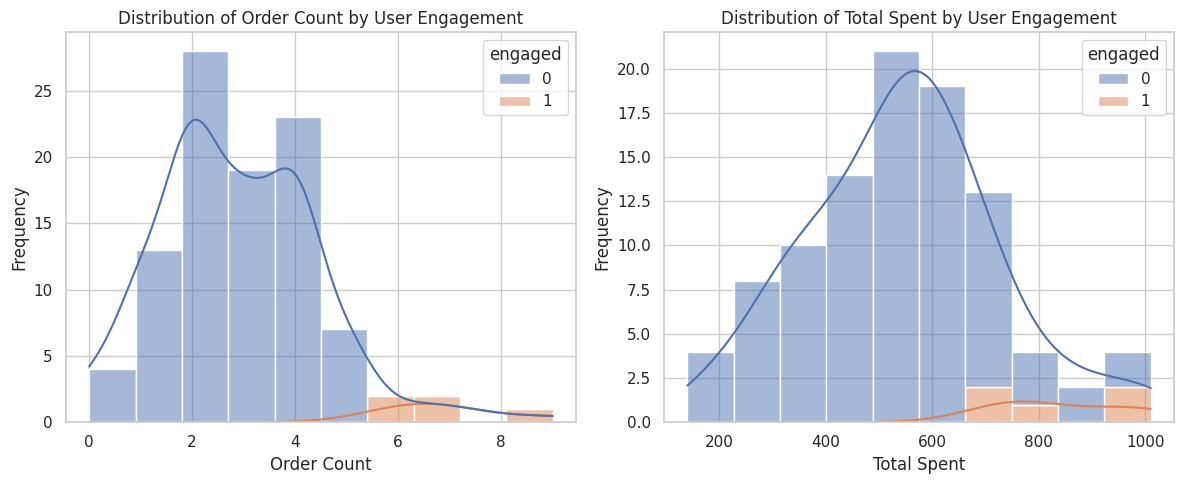

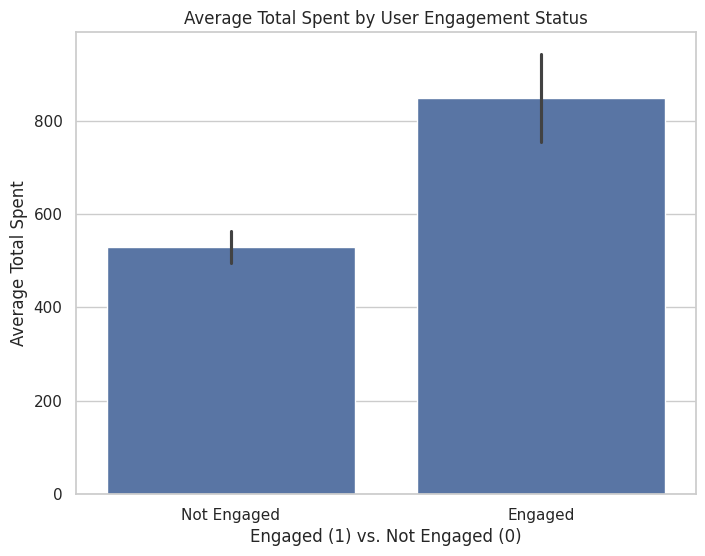

In [15]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that matplotlib inline works if you're using Jupyter Notebook
%matplotlib inline

# After the previous code (where user_engagement is defined)

# Step 8: Visualize Distribution of Order Count and Total Spent
plt.figure(figsize=(12, 5))

# Subplot for order count distribution
plt.subplot(1, 2, 1)
sns.histplot(user_engagement, x='order_count', hue='engaged', multiple='stack', bins=10, kde=True)
plt.title('Distribution of Order Count by User Engagement')
plt.xlabel('Order Count')
plt.ylabel('Frequency')

# Subplot for total spent distribution
plt.subplot(1, 2, 2)
sns.histplot(user_engagement, x='total_spent', hue='engaged', multiple='stack', bins=10, kde=True)
plt.title('Distribution of Total Spent by User Engagement')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 9: Bar Plot for Average Total Spent by Engagement Status
plt.figure(figsize=(8, 6))
sns.barplot(x='engaged', y='total_spent', data=user_engagement, estimator=np.mean)
plt.title('Average Total Spent by User Engagement Status')
plt.xlabel('Engaged (1) vs. Not Engaged (0)')
plt.ylabel('Average Total Spent')
plt.xticks(ticks=[0, 1], labels=['Not Engaged', 'Engaged'])
plt.show()
